# Iniatializing Plotting and auxilary tools

In [114]:
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap
import numpy

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pickle

import numpy as np
from scipy import *
from scipy.constants import *

%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.ticker

#from resonator_tools import circuit

from scipy import optimize
from scipy.optimize import curve_fit

import re

# Создаем форматер
formatter = matplotlib.ticker.ScalarFormatter ()
formatter.set_powerlimits((-3, 1))
hfont = {'fontname':'Arial'}

from ipywidgets import IntProgress
from IPython.display import display
import time

In [115]:
def freq_to_field(frequency):
    return frequency/28
def field_to_freq(field):
    return field*28
def kelvin_to_GHz(kelvin):
    return 20.8334*kelvin
def GHz_to_kelvin(GHz):
    return 0.048*GHz

def get_mult_freq(frequency):
    return frequency/12
def get_der_freq(frequency):
    return frequency*12

In [116]:
def unwrap_phase(datapha):
    for i in range(0, len(datapha)-1):
        if datapha[i+1]-datapha[i] >= numpy.pi:
            datapha[i+1] = datapha[i+1] - 2.*numpy.pi
        elif datapha[i+1]-datapha[i] <= -numpy.pi:
            datapha[i+1] = datapha[i+1] + 2.*numpy.pi
    return datapha
def total_unwrap(datapha):
    j = 0
    for i in range(0, len(datapha)-1):
        if datapha[i+1]-datapha[i] >= numpy.pi:
            j=j+1
        elif datapha[i+1]-datapha[i] <= -numpy.pi:
            j=j+1
    for i in range(0, j):
        unwrap_phase(datapha)
    return datapha

# Plotting VNA data vs Magnetic field

In [101]:
with open("instruments/_labbrick/experimental data/vna 3Dscan,Ramping Magnetic field from 0.2107T to 0.2178T. -50dBm 20220202162008.txt", "r+") as f:
    data=re.split('[\[\]]', f.read().replace('\n', ''))

In [102]:
data = list(filter(lambda x: x != "", data))

In [103]:
field = []
S21 = []
phase = []

In [104]:
for i_id, i_value in enumerate(list(data)):
    if i_id%3 == 0:
        field.append(float(i_value))
    if i_id%3 == 1:
        S21.append(list(filter(lambda x: x != "", (re.split('[,\n ]', (i_value))))))  
    if i_id%3 == 2:
        phase.append(list(filter(lambda x: x != "", (re.split('[,\n ]', (i_value)))))) 

In [105]:
freq_steps = np.size(S21[0])
freq=np.linspace(5.9,6.10, freq_steps)       

field_steps = np.size(field)

In [106]:
Transmission = np.zeros((field_steps,freq_steps), dtype=float)
Phase = np.zeros((field_steps,freq_steps), dtype=float)

In [107]:
for i in np.arange(field_steps):
    for j in np.arange(freq_steps):
        Transmission[i][j] = 10*np.log(float(S21[i][j]))
        Phase[i][j] = float(phase[i][j])

substract the background

In [108]:
Transmission_nobg = np.zeros((field_steps,freq_steps), dtype=float)
for i_id,i_value in enumerate(Transmission_nobg):
    Transmission_nobg[i_id]=Transmission[i_id] - Transmission[1]

Text(5.91, 0.2175, '(b)')

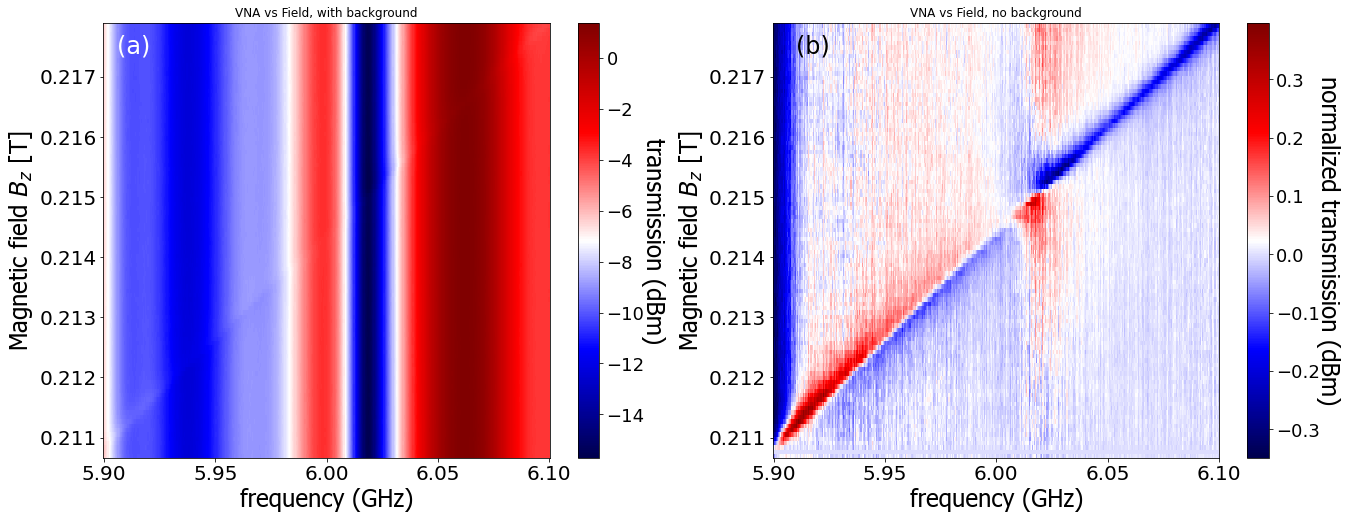

In [109]:
hfont = {'fontname':'Tahoma'}
fig, axes = plt.subplots(1,2, figsize=(22, 8))

axes[0].set_title('VNA vs Field, with background')
axes[1].set_title('VNA vs Field, no background')
axes[0].tick_params(axis='x', labelsize=20)
axes[0].tick_params(axis='y', labelsize=20)
axes[1].tick_params(axis='x', labelsize=20)
axes[1].tick_params(axis='y', labelsize=20)
axes[0].set_xlabel('frequency (GHz)', fontsize=24, **hfont)
axes[0].set_ylabel('Magnetic field $B_z$ [T]', fontsize=24, **hfont)
axes[1].set_xlabel('frequency (GHz)', fontsize=24, **hfont)
axes[1].set_ylabel('Magnetic field $B_z$ [T]', fontsize=24, **hfont)


p = axes[0].pcolor(freq, field, Transmission, cmap=cm.seismic, shading='auto')
#p = axes[1].pcolor(freq, field, Phase, cmap=cm.seismic, shading='auto')

cb = fig.colorbar(p, ax=axes[0])
cb.set_label(r'transmission (dBm)', labelpad=20, rotation=270, fontsize=24, **hfont)
cb.ax.tick_params(labelsize=18)

p = axes[1].pcolor(freq, field, Transmission_nobg, cmap=cm.seismic, shading='auto')
cb = fig.colorbar(p, ax=axes[1])
cb.set_label(r'normalized transmission (dBm)', labelpad=20, rotation=270, fontsize=24, **hfont)
cb.ax.tick_params(labelsize=18)


matplotlib.pyplot.text(5.605, 0.2175,'(a)', fontsize=24, verticalalignment='center',color = 'w')
matplotlib.pyplot.text(5.91, 0.2175,'(b)', fontsize=24, verticalalignment='center')

#plt.gcf().set_size_inches(22,8)
#plt.savefig("C:/Pictures/Landau exitation 6GHz.pdf", bbox_inches="tight")

In [112]:
for i_id, i_value in enumerate(field):
    total_unwrap(Phase[i_id])

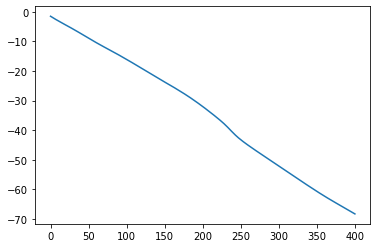

In [113]:
plt.plot(Phase[32])

substract the background

In [14]:
Phase_nobg = np.zeros((field_steps,freq_steps), dtype=float)
for i_id,i_value in enumerate(Phase_nobg):
    Phase_nobg[i_id]=Phase[i_id] - Phase[0]

Text(5.905, 0.2175, '(c)')

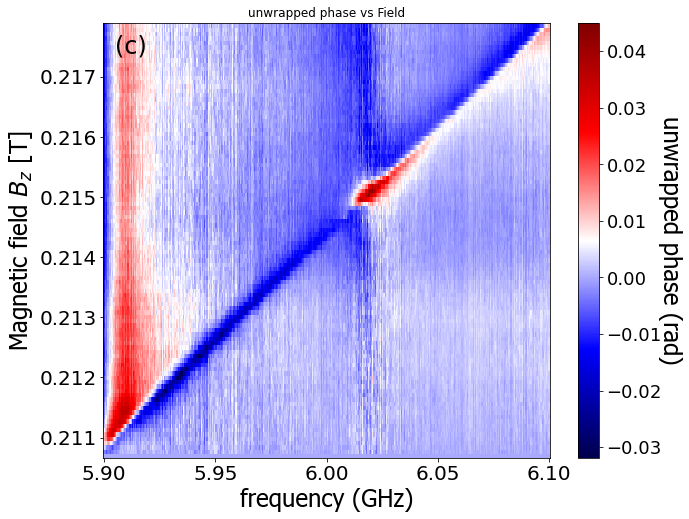

In [110]:
fig, axes = plt.subplots(1,1,figsize=(10, 8))

axes.set_title('unwrapped phase vs Field')
axes.tick_params(axis='x', labelsize=20)
axes.tick_params(axis='y', labelsize=20)

axes.set_ylabel('Magnetic field $B_z$ [T]', fontsize=24, **hfont)
axes.set_xlabel('frequency (GHz)', fontsize=24, **hfont)

p = axes.pcolor(freq, field, Phase_nobg, cmap=cm.seismic, shading='auto')

cb = fig.colorbar(p, ax=axes)
cb.set_label(r'unwrapped phase (rad)', labelpad=20, rotation=270, fontsize=24, **hfont)
cb.ax.tick_params(labelsize=18)

matplotlib.pyplot.text(5.905, 0.2175,'(c)', fontsize=24, verticalalignment='center')

#plt.gcf().set_size_inches(10,8)
#plt.savefig("C:/Pictures/Landau exitation 6GHz, phase.pdf", bbox_inches="tight")

# crossection

Text(0, 0.5, 'phase (rad)')

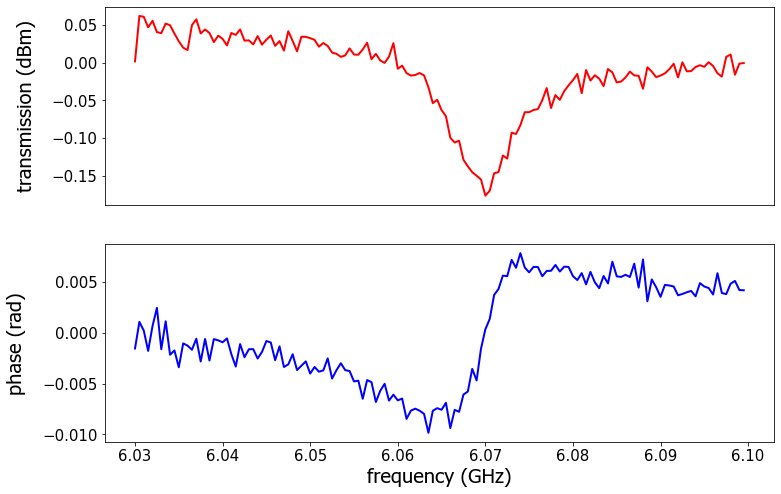

In [40]:
fig, axes = plt.subplots(2,1,figsize=(12, 8))

p = axes[0].plot(freq[260:400], Transmission_nobg[85][260:400], linewidth=2.0, c = 'r', label='Amplitude')

#axes.axis('tight')
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[0].set_ylabel(r'transmission (dBm)', labelpad=16, fontsize=20, **hfont)
axes[0].xaxis.set_visible(False)

p = axes[1].plot(freq[260:400], Phase_nobg[85][260:400], linewidth=2.0, c = 'b', label='Amplitude')

#axes.axis('tight')
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)
axes[1].set_xlabel('frequency (GHz)', fontsize=20, **hfont)
axes[1].set_ylabel(r'phase (rad)', labelpad=16, fontsize=20, **hfont)

# Fitting, Complex Resonator Model

Following Khalil et al. (https://arxiv.org/abs/1108.3117), we can model the forward transmission of a microwave resonator with total quality factor $Q$, coupling quality factor $Q_e$, and resonant frequency $f_0$ using:

$
S_{21}(f) = 1 - \frac{QQ_e^{-1}}{1+2jQ(f-f_0)/f_0}
$

$S_{21}$ is thus a complex function of a real frequency.
By allowing $Q_e$ to be complex, this model can take into account mismatches in the input and output transmission impedances.

In [71]:
import lmfit

Since scipy.optimize and lmfit require real parameters, we represent $Q_e$ as Q_e_real + 1j*Q_e_imag.

In [72]:
def linear_resonator(f, f_0, Q, Q_e_real, Q_e_imag):
    Q_e = Q_e_real + 1j*Q_e_imag
    return (1 - (Q * Q_e**-1 / (1 + 2j * Q * (f - f_0) / f_0)))

In [73]:
class ResonatorModel(lmfit.model.Model):
    #__doc__ = "resonator model" + lmfit.models.COMMON_DOC

    def __init__(self, *args, **kwargs):
        # pass in the defining equation so the user doesn't have to later.
        super().__init__(linear_resonator, *args, **kwargs)

        self.set_param_hint('Q', min=0)  # Enforce Q is positive

    def guess(self, data, f=None, **kwargs):
        verbose = kwargs.pop('verbose', None)
        if f is None:
            return
        argmin_s21 = np.abs(data).argmin()
        fmin = f.min()
        fmax = f.max()
        f_0_guess = f[argmin_s21]  # guess that the resonance is the lowest point
        Q_min = 0.1 * (f_0_guess/(fmax-fmin))  # assume the user isn't trying to fit just a small part of a resonance curve.
        delta_f = np.diff(f)  # assume f is sorted
        min_delta_f = delta_f[delta_f > 0].min()
        Q_max = f_0_guess/min_delta_f  # assume data actually samples the resonance reasonably
        Q_guess = np.sqrt(Q_min*Q_max)  # geometric mean, why not?
        Q_e_real_guess = Q_guess/(1-np.abs(data[argmin_s21]))
        if verbose:
            print("fmin=", fmin, "fmax=", fmax, "f_0_guess=", f_0_guess)
            print("Qmin=", Q_min, "Q_max=", Q_max, "Q_guess=", Q_guess, "Q_e_real_guess=", Q_e_real_guess)
        params = self.make_params(Q=Q_guess, Q_e_real=Q_e_real_guess, Q_e_imag=0, f_0=f_0_guess)
        params['%sQ' % self.prefix].set(min=Q_min, max=Q_max)
        params['%sf_0' % self.prefix].set(min=fmin, max=fmax)
        return lmfit.models.update_param_vals(params, self.prefix, **kwargs)

In [92]:
#resonator = ResonatorModel()
#true_params = resonator.make_params(f_0=100, Q=10000, Q_e_real=9000, Q_e_imag=-9000)

#f = np.linspace(99.95, 100.05, 100)
#true_s21 = resonator.eval(params=true_params, f=f)
#noise_scale = 0.02
#np.random.seed(123)
#measured_s21 = true_s21 + noise_scale*(np.random.randn(100) + 1j*np.random.randn(100))

#plt.figure()
#plt.plot(f, 20*np.log10(np.abs(measured_s21)))
#plt.ylabel('|S21| (dB)')
#plt.xlabel('MHz')
#plt.title('simulated measurement')

In [97]:
f = freq[260:400]*1e9
measured_S21 = np.exp(Transmission_nobg[85][260:400]/10)+1j*Phase_nobg[85][260:400]

In [98]:
guess = resonator.guess(measured_S21, f=f, verbose=True)

fmin= 6030000000.0 fmax= 6099500000.0 f_0_guess= 6069999999.999999
Qmin= 8.733812949640287 Q_max= 12140.000000023154 Q_guess= 325.6201609373033 Q_e_real_guess= 18654.44979187268


In [99]:
result = resonator.fit(measured_S21, params=guess, f=f, verbose=True)

print(result.fit_report() + '\n')
result.params.pretty_print()

[[Model]]
    Model(linear_resonator)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 31
    # data points      = 280
    # variables        = 4
    chi-square         = 9.5993e-04
    reduced chi-square = 3.4780e-06
    Akaike info crit   = -3515.36258
    Bayesian info crit = -3500.82343
[[Variables]]
    f_0:       6.0689e+09 +/- 191404.304 (0.00%) (init = 6.07e+09)
    Q:         738.818018 +/- 34.4386995 (4.66%) (init = 325.6202)
    Q_e_real:  43280.6155 +/- 1540.52011 (3.56%) (init = 18654.45)
    Q_e_imag: -12137.5131 +/- 1539.97919 (12.69%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(Q, Q_e_real)   = 0.708
    C(f_0, Q_e_imag) = 0.708
    C(f_0, Q_e_real) = 0.198
    C(Q, Q_e_imag)   = -0.197

Name         Value      Min      Max   Stderr     Vary     Expr Brute_Step
Q            738.8    8.734 1.214e+04    34.44     True     None     None
Q_e_imag  -1.214e+04     -inf      inf     1540     True     None     None
Q_e_rea

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'MHz')

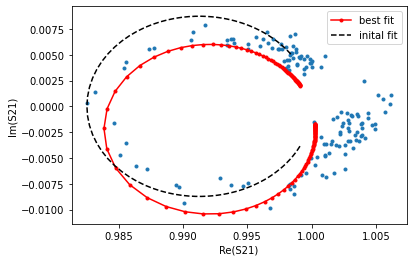

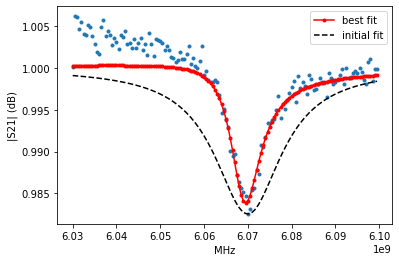

In [100]:
def plot_ri(data, *args, **kwargs):
    plt.plot(data.real, data.imag, *args, **kwargs)


fit_s21 = resonator.eval(params=result.params, f=f)
guess_s21 = resonator.eval(params=guess, f=f)

plt.figure()
plot_ri(measured_S21, '.')
plot_ri(fit_s21, 'r.-', label='best fit')
plot_ri(guess_s21, 'k--', label='inital fit')
plt.legend(loc='best')
plt.xlabel('Re(S21)')
plt.ylabel('Im(S21)')

plt.figure()
plt.plot(f, measured_S21, '.')
plt.plot(f, fit_s21, 'r.-', label='best fit')
plt.plot(f, guess_s21, 'k--', label='initial fit')
plt.legend(loc='best')
plt.ylabel('|S21| (dB)')
plt.xlabel('MHz')

In [363]:
y = total_unwrap(Phase[54])
x = freq

In [364]:
coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef)

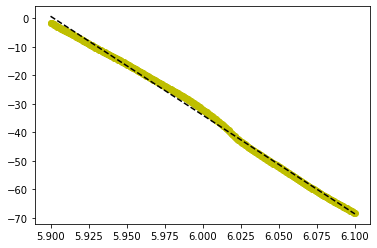

In [365]:
plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k') #'--k'=black dashed line, 'yo' = yellow circle marker